## Pandas (Python Data Analysis Library)

https://pandas.pydata.org/pandas-docs/stable/


 [pandas cheat sheet ](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

## 개요

데이터 분석을 위한 파이선 라이브러리  
pandas는 numpy 라이브러리 기반으로 개발

* 사용 가능한 데이터 유형  
  * SQL 테이블 또는 Excel 스프레드 시트에서와 같이 서로 다른 데이터형으로 열을 구성하는 테이블 형식 데이터  
  * 정렬되거나 정렬되지 않은 시계열 데이터.  
  * 행, 열의 레이블이 포함 행렬 데이터  
  * 서로 다른 형태의 관찰 또는 통계 데이터 집합  

* pandas 데이터 구조
 * Series :  같은 자료형으로 구성된 1 차원 배열 구조
 * DataFrame : 서로 다른 데이터 형으로 구성가능한 2 차원 테이블 구조 (R의 DataFrame이 제공하는 기능과 유사)


###  기능
* missing data (NaN)  
* inserted and deleted from DataFram  
* group by  
* easy to convert  
* slicing, fancy indexing, and subsetting  
* merging and joining   
* reshaping  
* saving / loading data : flat files (CSV), Excel files, databases  
* Time series data processing

### 1. 데이터 객체 생성


### 1)Series

모든 데이터 유형 (정수, 문자열, 부동 소수점 수, 파이썬 객체 등)을 포함할 수 있는 일차원 레이블 배열  

   **s = pd.Series(data, index=index)**
         
         
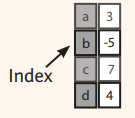


In [1]:
#사용할 라이브러리 import
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
#Series, python list로 생성, 인덱스 자동생성(순번)
s1 = pd.Series([10,20,30,40,50])  
display("s1=", s1)
print("index=", s1.index)
print("Values=", s1.values)

#Series, python list로 생성, 인덱스(레이블) 포함
s2 = pd.Series([10,20,30,40,50], index=['a', 'b', 'c', 'd', 'e']) 
display("s2=", s2)
print("index=", s2.index)
print("values=", s2.values)

's1='

0    10
1    20
2    30
3    40
4    50
dtype: int64

index= RangeIndex(start=0, stop=5, step=1)
Values= [10 20 30 40 50]


's2='

a    10
b    20
c    30
d    40
e    50
dtype: int64

index= Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
values= [10 20 30 40 50]


In [3]:
#Series, numpy ndarray로 생성
s1 = pd.Series(np.random.randn(5)) 
s2 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e']) 
display("s1=", s1)
display("s2=", s2)

#Series, 파이선 dicts, KEY-VALUE 로 생성
d = {'b': 1, 'a': 0, 'c' : 2}  
s3 = pd.Series(d)  #Key는 레이블로 처리
display("s3=", s3)

#Series, 하나의 값으로 생성, scalar value
s4= pd.Series(5., index=['a', 'b', 'c', 'd', 'e']) 
display("s4=", s4)

#Series, numpy의 ndarray와 유사한 속성으로 차원, 형태, 타입 확인
print("s1.ndim=", s1.ndim)
print("s1.shape=", s1.shape)
print("s1.dtype=", s1.dtype)

's1='

0   -0.511948
1    0.056926
2    1.796421
3   -2.062504
4    0.077298
dtype: float64

's2='

a    0.447435
b   -1.182863
c   -1.910945
d   -0.057221
e   -1.212387
dtype: float64

's3='

b    1
a    0
c    2
dtype: int64

's4='

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

s1.ndim= 1
s1.shape= (5,)
s1.dtype= float64


In [4]:
#Series, numpy의 ndarray와 유사한 인덱싱, 슬라이싱
display("s1=", s1)
display("s1[0]=", s1[0])         #index 0에 해당하는 값
display("s1[:2]=", s1[:2])       #처음부터 index (2-1)
display("s1[1:5:2]=", s1[1:5:2]) #1부터 index (5-1), step 2
display("s1[3:]=", s1[3:])       #3부터 끝까지
display("s1[-2:]=", s1[-2:])    #끝에서 두번째부터 끝까지

#Series, 파이선 dicts와 유사한 인덱싱
print("s3['a']=", s3['a'])           #'a' 인덱스의 값 추출
print("s3.get('a')=", s3.get('a'))
print ("'c' in s3 = ", 'c' in s3)  #s3 인덱스에 'c'존재여부 판단

's1='

0   -0.511948
1    0.056926
2    1.796421
3   -2.062504
4    0.077298
dtype: float64

's1[0]='

-0.5119481552308423

's1[:2]='

0   -0.511948
1    0.056926
dtype: float64

's1[1:5:2]='

1    0.056926
3   -2.062504
dtype: float64

's1[3:]='

3   -2.062504
4    0.077298
dtype: float64

's1[-2:]='

3   -2.062504
4    0.077298
dtype: float64

s3['a']= 0
s3.get('a')= 0
'c' in s3 =  True


### 2)DataFrame

 * 서로 다른 자료형으로 열을 구성할 수 있는 2 차원 데이터 구조  
 * 행의 레이블 index, 열의 레이블 columns 사용 
 * 엑셀 스프레드시트, SQL 테이블, Series 객체의 dict 구조  
 
 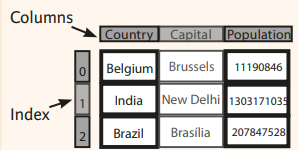
 

**(1)DataFrame 생성**    

In [52]:
#DataFrame 생성 
#DataFrame: data + index + columns
#DataFrame, From ndarrays, list
data = np.random.randint(8, size=(5, 3)) #random number
idx = np.arange(5)
col = list('ABC')
df = pd.DataFrame(data, index=idx, columns=col)  #data, 핼, 열 레이블 설정
display(df)  #DataFrame 확인

,A,B,C
0,7,1,6
1,4,1,2
2,2,5,1
3,4,7,0
4,1,4,6


In [53]:
#DataFrame 속성 확인
print("df.dtypes = ", df.dtypes)    #데이터 타입들
print("df.index = ", df.index)      #행 레이블
print("df.columns = ", df.columns)  #열 레이블
print("df.values=", df.values)  # 데이터값들

df.dtypes =  A    int32
B    int32
C    int32
dtype: object
df.index =  Int64Index([0, 1, 2, 3, 4], dtype='int64')
df.columns =  Index(['A', 'B', 'C'], dtype='object')
df.values= [[7 1 6]
 [4 1 2]
 [2 5 1]
 [4 7 0]
 [1 4 6]]


In [7]:
#DataFrame, From ndarrays, list
data = np.random.randint(10, size=(5,4)) #random number
col = list('ABCD')
dates = pd.date_range('20200101', periods=5)
df2 = pd.DataFrame(data)  #data만으로 생성
df2.index = dates         #행 레이블 설정
df2.columns = col         #열레이블 설정
display("df2=", df2)

print("df2.dtypes = ", df2.dtypes)    #데이터 타입들
print("df2.index = ", df2.index)      #행 레이블
print("df2.columns = ", df2.columns)  #열 레이블
display("df2.values=", df2.values)  # 데이터값들


#DataFrame , From dict of ndarrays / lists
d = {'one': [1., 2., 3., 4.],
     'two': [4., 3., 2., 1.]}
df3 = pd.DataFrame(d)
df4 = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
display("df3=", df3)
display("df4=", df4)

#DataFrame , From dict of Series or dicts
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df5 = pd.DataFrame(d)
display("df5=", df5)

#서로 다른 자료형으로 구성된 데이터프레임 생성
df6 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20200101'), 
                     'C': pd.Series(1, index=[0,1,2,3], dtype='float32'),
                     'D': np.array([3,4,5,6], dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F' : 'foo'})
display("df6=", df6)
print("df6.dtypes=", df6.dtypes)


'df2='

,A,B,C,D
2020-01-01,8,4,7,5
2020-01-02,9,5,8,9
2020-01-03,4,6,0,6
2020-01-04,9,4,9,8
2020-01-05,3,0,0,9


df2.dtypes =  A    int32
B    int32
C    int32
D    int32
dtype: object
df2.index =  DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05'],
              dtype='datetime64[ns]', freq='D')
df2.columns =  Index(['A', 'B', 'C', 'D'], dtype='object')


'df2.values='

array([[8, 4, 7, 5],
       [9, 5, 8, 9],
       [4, 6, 0, 6],
       [9, 4, 9, 8],
       [3, 0, 0, 9]])

'df3='

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


'df4='

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


'df5='

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


'df6='

,A,B,C,D,E,F
0,1.0,2020-01-01,1.0,3,test,foo
1,1.0,2020-01-01,1.0,4,train,foo
2,1.0,2020-01-01,1.0,5,test,foo
3,1.0,2020-01-01,1.0,6,train,foo


df6.dtypes= A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


**(2)DataFrame 확인(Viewing)**  

In [8]:
#DataFrame 생성
data = np.random.randint(10, size=(7, 3))
col = list('XYZ')
dates = pd.date_range('20200101', periods=7)
df = pd.DataFrame(data,index=dates, columns=col) 
display(df)

#DataFrame display
print("df=", df)  #전체 출력
print("df.head()=", df.head()) #상단행 5개
print("df.tail(3)=", df.tail(3)) #하단행 3개

#DataFrame 속성
print("df.dtypes = ", df.dtypes)    #데이터 타입들
print("df.index = ", df.index)      #행 레이블
print("df.columns = ", df.columns)  #열 레이블
print("df.values = ", df.values)    #데이터

,X,Y,Z
2020-01-01,2,8,3
2020-01-02,7,3,9
2020-01-03,2,8,8
2020-01-04,9,4,2
2020-01-05,2,9,9
2020-01-06,2,8,5
2020-01-07,2,4,5


df=             X  Y  Z
2020-01-01  2  8  3
2020-01-02  7  3  9
2020-01-03  2  8  8
2020-01-04  9  4  2
2020-01-05  2  9  9
2020-01-06  2  8  5
2020-01-07  2  4  5
df.head()=             X  Y  Z
2020-01-01  2  8  3
2020-01-02  7  3  9
2020-01-03  2  8  8
2020-01-04  9  4  2
2020-01-05  2  9  9
df.tail(3)=             X  Y  Z
2020-01-05  2  9  9
2020-01-06  2  8  5
2020-01-07  2  4  5
df.dtypes =  X    int32
Y    int32
Z    int32
dtype: object
df.index =  DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')
df.columns =  Index(['X', 'Y', 'Z'], dtype='object')
df.values =  [[2 8 3]
 [7 3 9]
 [2 8 8]
 [9 4 2]
 [2 9 9]
 [2 8 5]
 [2 4 5]]


In [9]:
#통계요약
print("df.describe()=", df.describe())

#Sorting by an axis:
dfsi = df.sort_index(axis=0, ascending=False)  #axis=0 (row)
display(dfsi)

#Sorting by values:
dfvy= df.sort_values(by='Y')
display(dfvy)

df.describe()=               X         Y         Z
count  7.000000  7.000000  7.000000
mean   3.714286  6.285714  5.857143
std    2.984085  2.497618  2.853569
min    2.000000  3.000000  2.000000
25%    2.000000  4.000000  4.000000
50%    2.000000  8.000000  5.000000
75%    4.500000  8.000000  8.500000
max    9.000000  9.000000  9.000000


,X,Y,Z
2020-01-07,2,4,5
2020-01-06,2,8,5
2020-01-05,2,9,9
2020-01-04,9,4,2
2020-01-03,2,8,8
2020-01-02,7,3,9
2020-01-01,2,8,3


,X,Y,Z
2020-01-02,7,3,9
2020-01-04,9,4,2
2020-01-07,2,4,5
2020-01-01,2,8,3
2020-01-03,2,8,8
2020-01-06,2,8,5
2020-01-05,2,9,9


### 문제 1. 데이터프레임 생성 연습

1) 5명의 성적 데이터 생성 (성명, 입학년도, 학점(0~4.5), 성별(M,F))  
열 : Name, Adyear, grade, sex    
행인덱스 : 순번   
2) 인덱스, 칼럼, 값들, 데이터타입 확인  
3)통계요약 확인  
4)성명순으로 정렬
5)성적 역순으로 정렬

### **(3)DataFrame,  Indexing / Selection**

  * loc[행레이블, 열레이블]  : 레이블로 행, 열 선택  
  * iloc(int, int)   : 위치값으로 행, 열 선택   

In [10]:
#DataFrame,  Indexing / Selection
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd']),
     'three': [5,6,7,8]}
df1 = pd.DataFrame(d)
display("df1=", df1)

#DataFrame,  row selection
display("df1[0:2]=", df1[0:2])                       #위치값 슬라이싱으로 선택
display("df1['a':'c']=", df1['a':'c'])               #행 레이블 슬라이싱으로 선택

display("df1.loc['a']=", df1.loc['a'])              #행 레이블로 선택
display("df1.loc['b':]=", df1.loc['b':])            #슬라이싱으로 여러행 선택
display("df1.loc[['a','c']]=", df1.loc[['a','c']])  #인덱스 배열로 여러 행 선택

display("df1.iloc[1]=", df1.iloc[1])                #행인덱스값으로 선택
display("df1.iloc[1:3]=", df1.iloc[1:3])

#DataFrame , Column selection,
display("df1['one']= ", df1['one'] )            #열레이블로 선택
display("df1.one= ", df1.one )                  #열레이블로 선택
display("df1[['one','three']]= ", df1[['one','three']] ) #열레이블 여러개 인덱스 배열로 선택

'df1='

,one,two,three
a,1.0,1.0,5
b,2.0,2.0,6
c,3.0,3.0,7
d,NaN,4.0,8


'df1[0:2]='

,one,two,three
a,1.0,1.0,5
b,2.0,2.0,6


"df1['a':'c']="

,one,two,three
a,1.0,1.0,5
b,2.0,2.0,6
c,3.0,3.0,7


"df1.loc['a']="

one      1.0
two      1.0
three    5.0
Name: a, dtype: float64

"df1.loc['b':]="

,one,two,three
b,2.0,2.0,6
c,3.0,3.0,7
d,NaN,4.0,8


"df1.loc[['a','c']]="

,one,two,three
a,1.0,1.0,5
c,3.0,3.0,7


'df1.iloc[1]='

one      2.0
two      2.0
three    6.0
Name: b, dtype: float64

'df1.iloc[1:3]='

,one,two,three
b,2.0,2.0,6
c,3.0,3.0,7


"df1['one']= "

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

'df1.one= '

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

"df1[['one','three']]= "

,one,three
a,1.0,5
b,2.0,6
c,3.0,7
d,NaN,8


In [11]:
#DataFrame , row, column selection,
display("df1.loc['a', 'one']=", df1.loc['a', 'one'])              #'a'행, 'one' 열
display("df1.loc[['a','c'], 'one']=", df1.loc[['a','c'], 'one'])  #['a','c']행, 'one' 열
display("df1.loc['a':'c', 'one':'two']=", df1.loc['a':'c',  'one':'two'])  #'a':'c'행,  'one':'two'열
display("df1.loc[:, ['one','three']]=", df1.loc[:, ['one','three']])  #['one','three']열의 모든행

display("df1['two']['a']= ", df1['two']['a'] )  #열레이블, 행레이블로 선택
display("df1['two']['b':]= ", df1['two']['b':] )  #열레이블, 행레이블 슬라이싱
display("df1['two'][2:]= ",df1['two'][2:] )     #열레이블, 행슬라이싱으로 선택

"df1.loc['a', 'one']="

1.0

"df1.loc[['a','c'], 'one']="

a    1.0
c    3.0
Name: one, dtype: float64

"df1.loc['a':'c', 'one':'two']="

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0


"df1.loc[:, ['one','three']]="

,one,three
a,1.0,5
b,2.0,6
c,3.0,7
d,NaN,8


"df1['two']['a']= "

1.0

"df1['two']['b':]= "

b    2.0
c    3.0
d    4.0
Name: two, dtype: float64

"df1['two'][2:]= "

c    3.0
d    4.0
Name: two, dtype: float64

In [12]:
#DataFrame ,bool indexing, 조건으로 인덱싱
#one 열의 값이 2이상인 경우
display("df1[df1.one >=2 ]= ", df1[df1.one >=2 ] )  
#one 열의 값이 1 ~ 2 범위인 경우
display("df1[(df1.one >= 1) & (df1.one <= 2) ]= ", df1[(df1.one >= 1) &  (df1.one <=2)] ) 
#one 열의 값이  2보다 작거나 3보다 큰 경우
display("df1[(df1.one < 2) | (df1.one > 3) ]= ", df1[(df1.one < 2) | (df1.one > 3) ] ) 
# one이 NaN인 경우
display("pd.isna(df1.one) =  ", pd.isna(df1.one) )  

'df1[df1.one >=2 ]= '

,one,two,three
b,2.0,2.0,6
c,3.0,3.0,7


'df1[(df1.one >= 1) & (df1.one <= 2) ]= '

,one,two,three
a,1.0,1.0,5
b,2.0,2.0,6


'df1[(df1.one < 2) | (df1.one > 3) ]= '

,one,two,three
a,1.0,1.0,5


'pd.isna(df1.one) =  '

a    False
b    False
c    False
d     True
Name: one, dtype: bool

### 문제 2. 데이터프레임 인덱싱 연습

5명의 성적 데이터 이용   
1)성명만 추출  
2)입학년도와 성적만 추출  
3)성명이 'kim'인 데이터만 추출  
4)입학년도가 2018년도 이상만 추출  
5)여성만 추출  
6)여성이면서 입학년도가 2019년도만 추출  
7)성적이 3.5이상이거나 남성인 경우 추출

### **(4)DataFrame, setting**

In [39]:
#DataFrame 생성
data = np.zeros((5,3))
idx= list('abcde')
col = list('XYZ')
df = pd.DataFrame(data,index=idx, columns=col) 
display(df)

#행 슬라이싱 인덱스로 값설정
df[3:] = 1
df['a':'b'] = 2
display(df)

#열레이블을 기준으로 값설정
df['X']['a'] = 10
df['X']['c':] = 20
df['Y'][['a','c']] = 30
display(df)

#행열 레이블로 값설정
df.at[['c','e'], 'X':'Y'] = 100
df.loc['d', :2] = -100
display(df)

,X,Y,Z
a,0.0,0.0,0.0
b,0.0,0.0,0.0
c,0.0,0.0,0.0
d,0.0,0.0,0.0
e,0.0,0.0,0.0


,X,Y,Z
a,2.0,2.0,2.0
b,2.0,2.0,2.0
c,0.0,0.0,0.0
d,1.0,1.0,1.0
e,1.0,1.0,1.0


,X,Y,Z
a,10.0,30.0,2.0
b,2.0,2.0,2.0
c,20.0,30.0,0.0
d,20.0,1.0,1.0
e,20.0,1.0,1.0


,X,Y,Z
a,10.0,30.0,2.0
b,2.0,2.0,2.0
c,100.0,100.0,0.0
d,-100.0,-100.0,1.0
e,100.0,100.0,1.0


In [40]:
#행열 위치로 값설정
df.iat[2, 1] = 1
df.iloc[3:, :1] = -1
display(df)

#열레이블로 행전체 값설정
df.loc[:, 'Z'] = np.arange(5)
display(df)

#조건으로 값설정, df 전체에서 음수값을 0으로 설정
df[df < 0] = 0
display(df)

#조건으로 값설정, Y열의 값이 10미만인 것을 9로 설정 
df.loc[df.Y < 10, 'Y'] = 9
display(df)

,X,Y,Z
a,10.0,30.0,2.0
b,2.0,2.0,2.0
c,100.0,1.0,0.0
d,-1.0,-100.0,1.0
e,-1.0,100.0,1.0


,X,Y,Z
a,10.0,30.0,0
b,2.0,2.0,1
c,100.0,1.0,2
d,-1.0,-100.0,3
e,-1.0,100.0,4


,X,Y,Z
a,10.0,30.0,0
b,2.0,2.0,1
c,100.0,1.0,2
d,0.0,0.0,3
e,0.0,100.0,4


,X,Y,Z
a,10.0,30.0,0
b,2.0,9.0,1
c,100.0,9.0,2
d,0.0,9.0,3
e,0.0,100.0,4


### **(5)DataFrame, addition, deletion**

#### deletion
- drop(): axis index (0 or ‘index’, default) or columns (1 or ‘columns’).  
  - df = df.drop(['column'], axis=1)  
  - df = df.drop(['row'])  


In [50]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df1 = pd.DataFrame(d)
display(df1)

#DataFrame , Row  addition
df1.loc['e'] = [10,10]  #새로운 index에 값 설정으로 추가
df1.loc['h'] = [5,6]   #새로운 index에 값 설정으로 추가
df1.loc['sum'] = df1.sum(axis=0)  #합을 구한 결과로 새로운 행 추가
display(df1)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,10.0,10.0
h,5.0,6.0
sum,21.0,26.0


In [51]:
#DataFrame, Row deletion
#drop : 삭제 결과를 반환하여 처리, 원본 유지
df1.drop(['e'])  #원본 유지되므로 삭제처리 안됨 
display(df1)
df1 = df1.drop(['sum'])        #반환으로 원본 수정
display(df1)
df1.drop(['e'], inplace=True)  #원본에서 삭제
display(df1)
df2= df1.drop(['a', 'h'])  #df1에서 'a','h' 행 삭제하여 df2에 저장
display(df2)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,10.0,10.0
h,5.0,6.0
sum,21.0,26.0


,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,10.0,10.0
h,5.0,6.0


,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
h,5.0,6.0


,one,two
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [48]:
#DataFrame , Column  addition
df1['three'] = df1['one'] + df1['two'] #열의 합으로 새로운 열 three 생성
df1['flag'] = df1['one'] > 3           #조건에 대한 논리값으로 새로운 열 flag 생성 
df1['class'] = 'bar'                   #문자열로 class열 생성
df1['one2'] = df1['one'][:2]           #one 열의 2개행만으로 one2열 생성
df1['new'] = [1,2,3,4,5]                #new열에 [1,2,3,4,5]로 추가
display(df1)

,one,two,three,flag,class,one2,new
a,1.0,1.0,2.0,False,bar,1.0,1
b,2.0,2.0,4.0,False,bar,2.0,2
c,3.0,3.0,6.0,False,bar,NaN,3
d,NaN,4.0,NaN,False,bar,NaN,4
h,5.0,6.0,11.0,True,bar,NaN,5


In [30]:
#DataFrame , Column  deletion

del df1['two']                         #two 열 삭제
display(df1)

df3=df1.drop(['one2'], axis=1)         # one2 column (axis=1) 삭제
display(df3)

tree = df1.pop('three')                 #three 열 삭제, 값을 반환 
print("three=", tree)
display(df1)

,one,three,flag,class,one2
a,1.0,2.0,False,bar,1.0
b,2.0,4.0,False,bar,2.0
c,3.0,6.0,False,bar,NaN
d,NaN,NaN,False,bar,NaN
h,5.0,11.0,True,bar,NaN


,one,three,flag,class
a,1.0,2.0,False,bar
b,2.0,4.0,False,bar
c,3.0,6.0,False,bar
d,NaN,NaN,False,bar
h,5.0,11.0,True,bar


three= a     2.0
b     4.0
c     6.0
d     NaN
h    11.0
Name: three, dtype: float64


,one,flag,class,one2
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,False,bar,NaN
d,NaN,False,bar,NaN
h,5.0,True,bar,NaN


### **(6)DataFrame, missing value**

In [31]:
#missing value 처리
df2 =df1.fillna(value=1)    #누락된 값을 채움
df3=df1.dropna(how='any')  #누락된 값 있는 행삭제
df4=pd.isna(df1)           #마스크 생성
display(df1)
display(df2)
display(df3)
display(df4)

,one,flag,class,one2
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,False,bar,NaN
d,NaN,False,bar,NaN
h,5.0,True,bar,NaN


,one,flag,class,one2
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,False,bar,1.0
d,1.0,False,bar,1.0
h,5.0,True,bar,1.0


,one,flag,class,one2
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0


,one,flag,class,one2
a,False,False,False,False
b,False,False,False,False
c,False,False,False,True
d,True,False,False,True
h,False,False,False,True


### 문제 3.  데이터프레임 행,열 추가 연습
    
    문제 1의 5명의 성적 데이터를 이용하여 다음 문제를 해결하세요       
1)성별 "F"는 "여"로, "M"은 "남"으로 변경 
2)새로운 학생 1명을 추가  
3)lee 학생을 인덱스로 접근하여 삭제 (원본 유지)  
4)age 열 추가   